In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_src = r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Carbononxolone\Fish 1\Post\2024-01-18 15.47.08 vid\Allied Vision Technologies GS650 0001f61c\*tif"
frame_rate = 120
frame_limit = 4000

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.max_frames = frame_limit
oog.run()

Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Carbononxolone\Fish 1\Post\2024-01-18 15.47.08 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Getting SADs
Getting phases


In [4]:
print(oog.sequence_manager.reference_indices)

[14, 102]


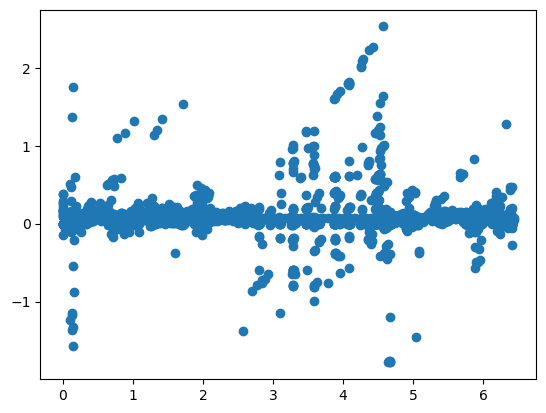

In [5]:
plt.scatter(oog.phases[1::], oog.delta_phases)

In [7]:
import j_py_sad_correlation as jps
import tifffile as tf

data = tf.imread(r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\2024-01-19 17.36.03 vid\Allied Vision Technologies GS650 0001f61c\215809.tif")
#data = np.concatenate(data, axis=0)
print(data.shape)

sad = []
for i in range(data.shape[0] - 10000):
    sad.append(jps.sad_with_references(data[i], data))

(1000, 220, 250)


In [8]:
print(np.array(sad).shape)

(0,)


In [9]:
for i in range(len(sad)):
    sad[i][i] = 93462

TypeError: Invalid shape (0,) for image data

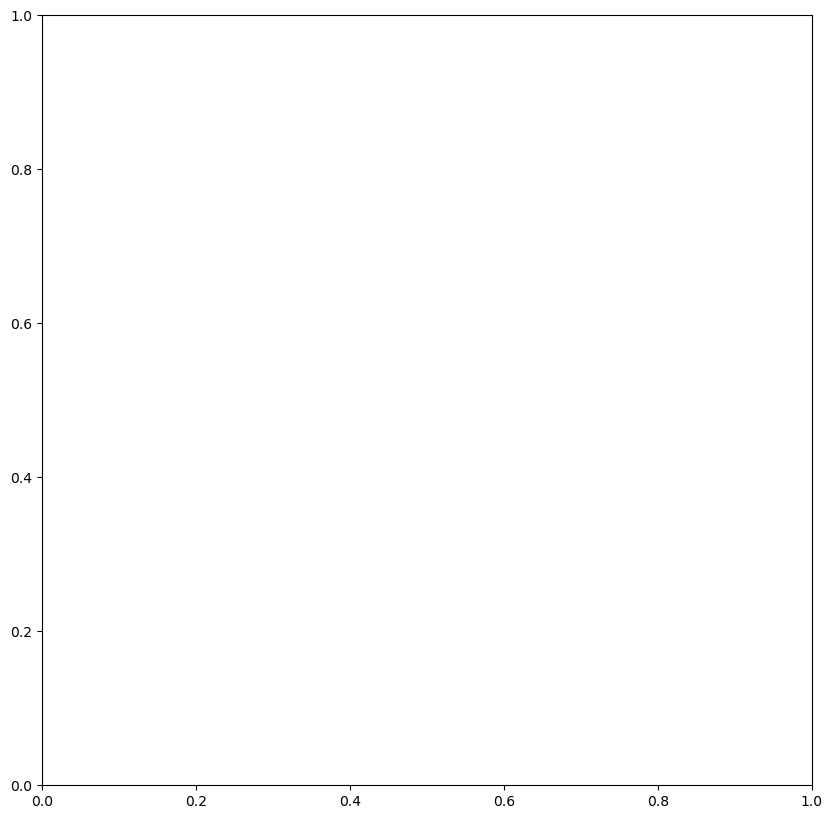

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(sad)
plt.axis("equal")
plt.show()

In [ ]:
plt.figure(figsize = (16,9))
plt.plot(np.min(sad, axis = 1))
plt.xlim(6500,8500)
plt.show()

MemoryError: Unable to allocate 2.98 GiB for an array with shape (20000, 20000) and data type float64

<Figure size 1600x900 with 0 Axes>

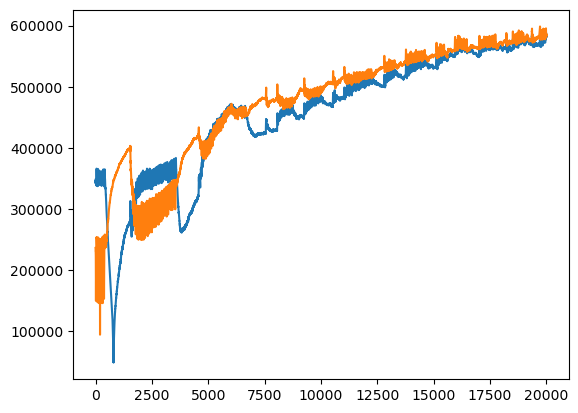

In [ ]:
plt.plot(sad[800])
plt.plot(sad[200])

In [12]:
diffs = []
for i in range(1, data.shape[0]):
    diffs.append(np.sum(np.abs(data[i] - data[i - 1])))

AxisError: axis 1 is out of bounds for array of dimension 1

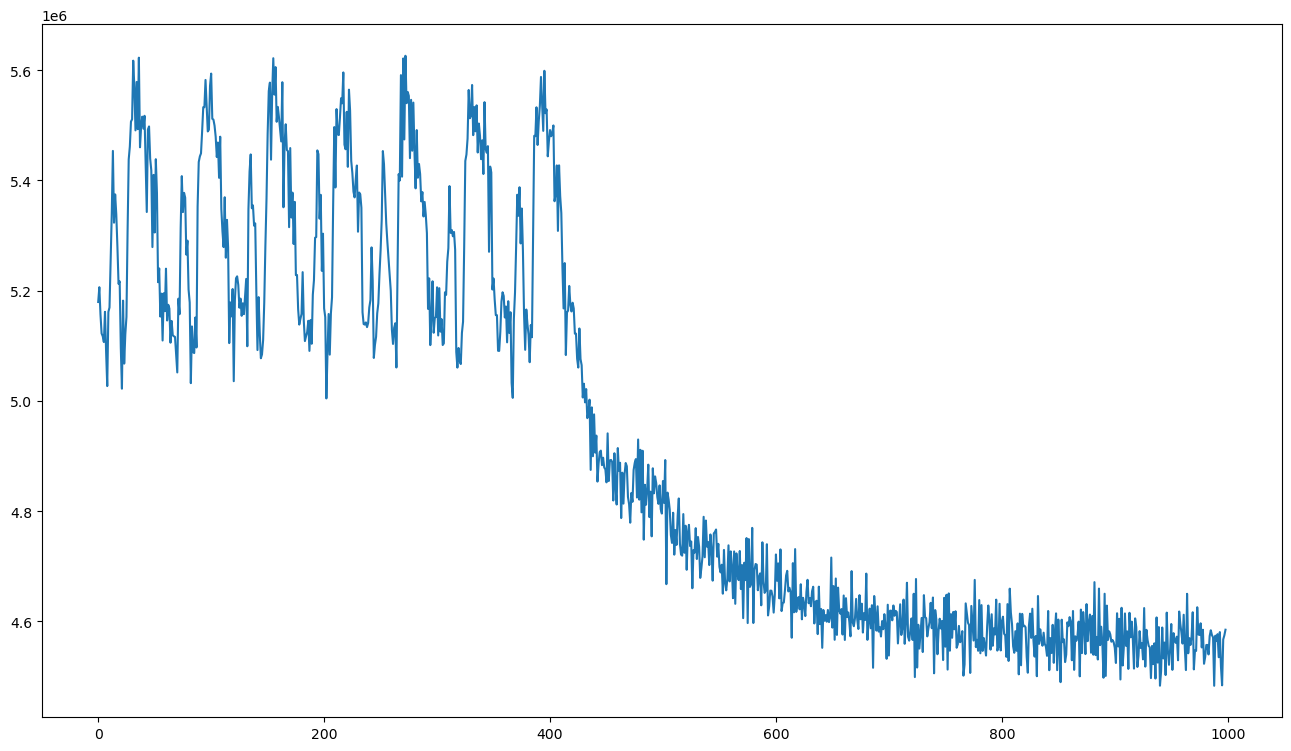

In [13]:
plt.figure(figsize = (16,9))
plt.plot(diffs)
plt.plot(np.min(sad, axis = 1) * 30 + np.min(diffs))
plt.show()

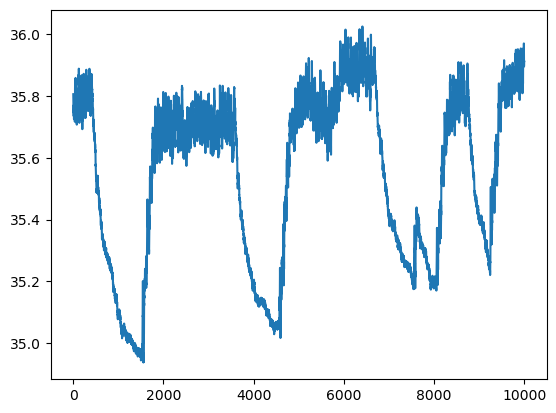

In [ ]:
plt.plot(np.mean(data, axis = (1,2)))
plt.show()

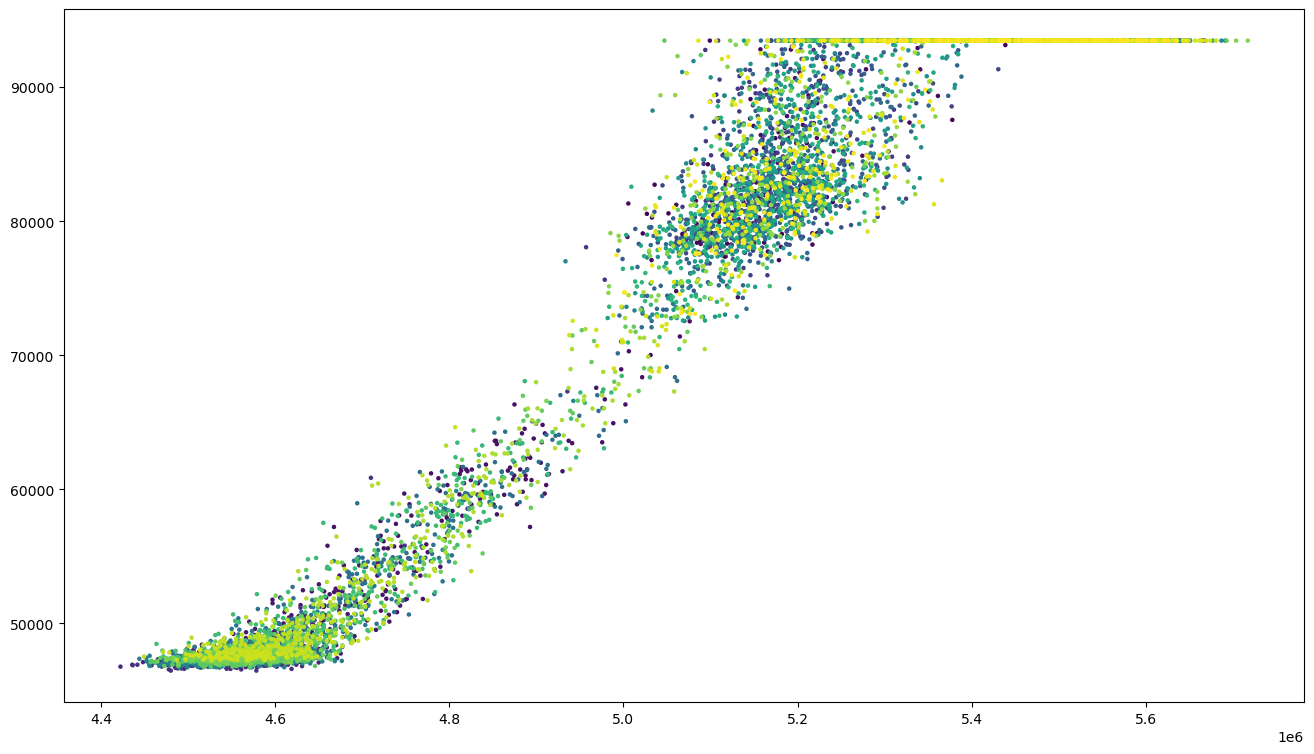

In [ ]:
plt.figure(figsize = (16,9))
plt.scatter(diffs, np.min(sad, axis = 1)[1::], s = 5, c = np.arange(len(diffs)))
plt.show()